In [82]:
import pandas as pd
import numpy as np

Base_Credit = pd.read_csv('credit_data.csv')
print(Base_Credit)
print(f'\n\n{Base_Credit.describe()}')
print(Base_Credit.columns)
print(f'\n\n{Base_Credit.isnull().sum()}')

np.unique(Base_Credit['default'], return_counts=True)

      clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[2000 rows x 5 columns]


          clientid        income          age          loan      default
count  2000.000000   2000.000000  1997.000000   2000.000000  2000.000000
mean   1000.500000  45331.600018    40.807559   4444.369695     0.141500
std     57

(array([0, 1], dtype=int64), array([1717,  283], dtype=int64))

Text(0, 0.5, 'Quantidade de entrevistados')

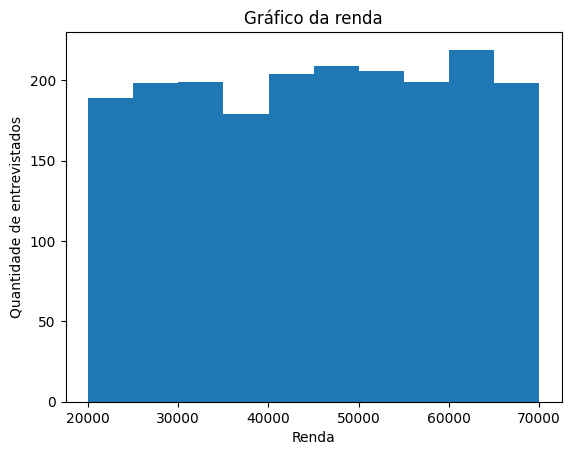

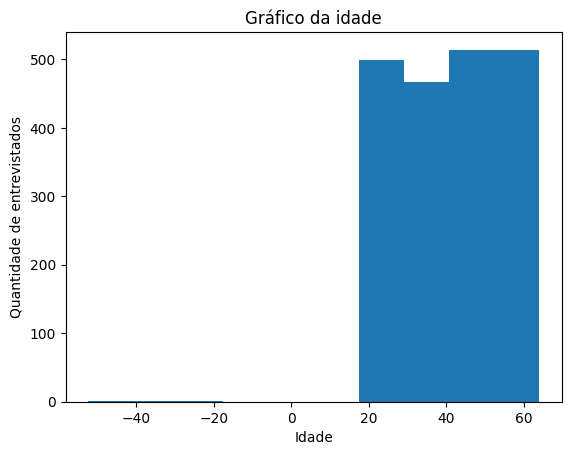

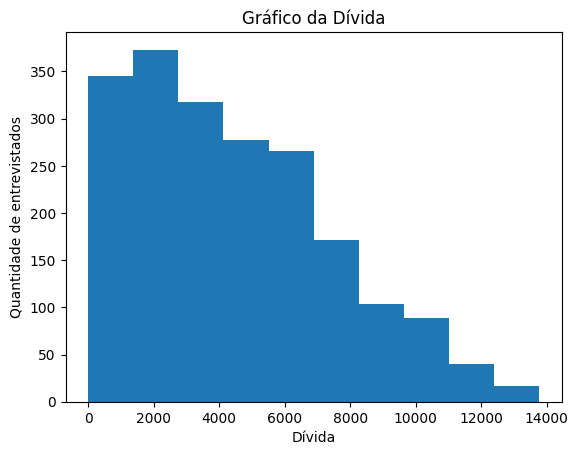

In [83]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.hist(Base_Credit['income']);
plt.title('Gráfico da renda')
plt.ylabel('Quantidade de entrevistados')
plt.xlabel('Renda')

plt.figure(2)
plt.hist(Base_Credit['age']);
plt.title('Gráfico da idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade de entrevistados')

plt.figure(3)
plt.hist(Base_Credit['loan'])
plt.title('Gráfico da Dívida')
plt.xlabel('Dívida')
plt.ylabel('Quantidade de entrevistados')



In [84]:
# Valores nulos:
Base_Credit.loc[Base_Credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [85]:
# média das idades com valores maiores que 0:
Media_Idade = Base_Credit['age'][Base_Credit['age'] > 0].mean()
print(f'Media das idades da base de dados: {round(Media_Idade, 2)} anos')

Media das idades da base de dados: 40.93 anos


In [86]:
# Tratamento de valores inconsistentes: 
Base_Credit.loc[Base_Credit['age'] < 0, 'age'] = Media_Idade
Base_Credit.loc[Base_Credit['clientid'].isin([16, 22, 27])]

,clientid,income,age,loan,default
15,16,50501.726689,40.9277,3977.287432,0
21,22,32197.620701,40.9277,4244.057136,0
26,27,63287.038908,40.9277,9595.286289,0


In [87]:
#Tratamento de valores faltantes:
print(Base_Credit.isnull().sum())
Base_Credit.loc[Base_Credit['age'].isnull()]


clientid    0
income      0
age         3
loan        0
default     0
dtype: int64


,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [88]:
# Substitui os valores faltantes pela média da idades:
Base_Credit['age'].fillna(Base_Credit['age'].mean(), inplace=True)

In [89]:
Base_Credit.loc[Base_Credit['clientid'].isin([29,31,32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.9277,2082.625938,0
30,31,48528.852796,40.9277,6155.784670,0
31,32,23526.302555,40.9277,2862.010139,0


In [90]:
Base_Credit.loc[pd.isnull(Base_Credit['age'])]
print(Base_Credit.isnull().sum())

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64


In [91]:
# Divisão entre previsore e classe
print(Base_Credit.columns)

#Previsores:
X_Base = Base_Credit.iloc[:, 0:4].values
print(X_Base[0])

# Classe:
Y_Base = Base_Credit.iloc[:, 4].values
print(Y_Base[0])

Index(['clientid', 'income', 'age', 'loan', 'default'], dtype='object')
[1.00000000e+00 6.61559251e+04 5.90170151e+01 8.10653213e+03]
0


In [92]:
# Escalonamento dos valores:

from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_Base = scaler_credit.fit_transform(X_Base)
print(X_Base[0])

[-1.731185    1.45393393  1.36538005  1.20281942]


In [93]:
# Divisão da base de treinamento e teste:

from sklearn.model_selection import train_test_split

X_Base_treinamento, Y_Base_treinamento, X_Base_teste, Y_Base_teste = train_test_split(X_Base, Y_Base, test_size= 0.25, random_state=0)

In [94]:
X_Base_treinamento.shape, Y_Base_treinamento.shape

((1500, 4), (500, 4))

In [95]:
X_Base_teste.shape, Y_Base_teste.shape

((1500,), (500,))

In [96]:
# Geração da base pre-processada:
import pickle

with open('credit.pkl', mode='wb') as file:
    pickle.dump([X_Base_treinamento, Y_Base_treinamento, X_Base_teste, Y_Base_teste], file)